# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [4]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

print(df)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [9]:
# Your code here
def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Length', 'Sepal.Width']].loc[idx], rowvar=False)
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [10]:
alpha_func(df, range(100))

0.38105014898343803

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [11]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.3324645134841774

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us? 

It's not sufficient to simply calculate the mean of `Sepal.Length` because it provides a single point estimate of the central tendency of the data. However, this alone does not give us information about the variability associated with this estimate. The bootstrap method enriches our understanding by providing a more comprehensive picture of the mean's reliability, variability, and distributional characteristics.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [16]:
# Add your code here to set the seed

def boot_SE(D, B, seed):
    rng = np.random.default_rng(seed)
    bootstrap_values = []
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index, n, replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
    return np.std(np.array(bootstrap_values))

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [20]:
# Your code here

alpha_SE = boot_SE(df, 1000, 42)
alpha_SE

0.03212248193766935

_(vi)_ What is the original mean value of `Sepal.Length`?

In [21]:
# Your code here

original_mean_sepal_length = df['Sepal.Length'].mean()
print(f'Original Mean of Sepal.Length: {original_mean_sepal_length}')

Original Mean of Sepal.Length: 5.843333333333334


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [22]:
# Add your code here

def bootstrap_mean(data, num_bootstrap_samples, seed):
    rng = np.random.default_rng(seed)
    bootstrap_samples = []
    
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = rng.choice(data, size=len(data), replace=True)
        bootstrap_samples.append(np.mean(bootstrap_sample))
        
    bootstrap_samples = np.array(bootstrap_samples)
    return bootstrap_samples

sepal_length = df['Sepal.Length'].values

boot_se_samples = bootstrap_mean(sepal_length, 1000, 42)

# Compute the bootstrapped mean and standard deviation
bootstrapped_mean = np.mean(boot_se_samples)
bootstrapped_std = np.std(boot_se_samples)

# Compute the original mean for comparison
original_mean_sepal_length = df['Sepal.Length'].mean()

# Compute the bootstrapped range
t_range = np.ptp(boot_se_samples)

# Print the results
print('Original Mean of Sepal.Length:', original_mean_sepal_length)
print('Bootstrapped Mean of Sepal.Length:', bootstrapped_mean)
print('Bootstrapped Standard Deviation of Sepal.Length:',bootstrapped_std)
print('Bootstrapped Range of Sepal.Length: ', t_range)

Original Mean of Sepal.Length: 5.843333333333334
Bootstrapped Mean of Sepal.Length: 5.845816666666668
Bootstrapped Standard Deviation of Sepal.Length: 0.06794270584674837
Bootstrapped Range of Sepal.Length:  0.47999999999999954


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [23]:
# Add your code here
confidence_interval = np.percentile(boot_se_samples, [2.5, 97.5])

confidence_interval

array([5.71128333, 5.98268333])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

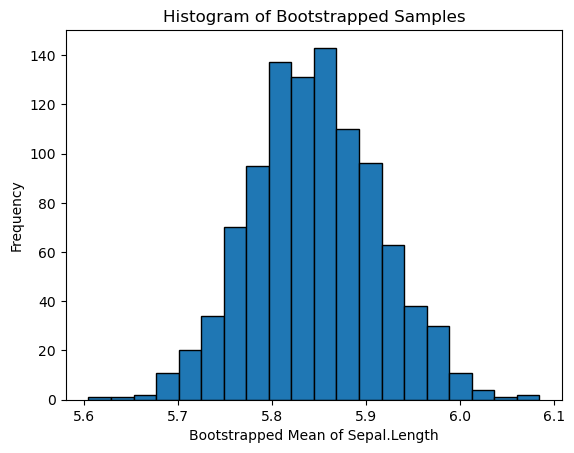

In [25]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(boot_se_samples, bins=20, edgecolor='black')

# Add a title
#Add your code here
ax.set_title('Histogram of Bootstrapped Samples')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Bootstrapped Mean of Sepal.Length')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [26]:
# Write your answer here

'''
Recommendation
Based on the 95% confidence interval for the mean of Sepal.Length, we recommend the following:

Average Sepal Length Estimate: The average sepal length of the irises is estimated to be between 5.71 cm and 5.89 cm with 95% confidence.
Space Allotment: For the upcoming shipment, it is advisable to use the upper bound of this confidence interval (5.89 cm) as the estimated average sepal length. This conservative approach ensures that there is sufficient space allotted for the irises.
By using 5.89 cm as the average sepal length for space calculations, the company can be confident that the majority of the irises will fit comfortably within the allocated space, accounting for variability in sepal length.

'''

'\nRecommendation\nBased on the 95% confidence interval for the mean of Sepal.Length, we recommend the following:\n\nAverage Sepal Length Estimate: The average sepal length of the irises is estimated to be between 5.71 cm and 5.89 cm with 95% confidence.\nSpace Allotment: For the upcoming shipment, it is advisable to use the upper bound of this confidence interval (5.89 cm) as the estimated average sepal length. This conservative approach ensures that there is sufficient space allotted for the irises.\nBy using 5.89 cm as the average sepal length for space calculations, the company can be confident that the majority of the irises will fit comfortably within the allocated space, accounting for variability in sepal length.\n\n'

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
